## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings

In [2]:
warnings.filterwarnings("ignore")
seed = 2024

## Carga de datos

In [3]:
ind_4 = pd.read_csv('data_paciente.csv')
ind_4 = ind_4.drop(columns='Unnamed: 0')
ind_4.head()

,A_date,A_id,S_ACC_day_total_IN_mg,S_ACC_day_total_LIG_mg,S_ACC_day_total_MOD_mg,S_ACC_day_total_VIG_mg,S_sleeponset_ts,S_wakeup_ts
0,2018-01-31,PRFE,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-01,PRFE,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-02,PRFE,10.300721,55.790294,170.053180,543.040000,23:49:50,09:50:15
3,2018-02-03,PRFE,10.725991,55.719336,154.367094,484.111765,02:22:00,13:59:45
4,2018-02-04,PRFE,3.883990,56.337911,149.440458,NaN,05:41:45,18:00:00


In [4]:
ind_4.shape

(49795, 8)

## Preprocesamiento

In [5]:
ind_4.isnull().sum()

A_date                        0
A_id                          0
S_ACC_day_total_IN_mg     48804
S_ACC_day_total_LIG_mg    48804
S_ACC_day_total_MOD_mg    48807
S_ACC_day_total_VIG_mg    49010
S_sleeponset_ts           48805
S_wakeup_ts               48805
dtype: int64

In [6]:
df_filtered = ind_4.dropna(subset=['S_ACC_day_total_IN_mg'])

In [7]:
df_filtered.isnull().sum()

A_date                      0
A_id                        0
S_ACC_day_total_IN_mg       0
S_ACC_day_total_LIG_mg      0
S_ACC_day_total_MOD_mg      3
S_ACC_day_total_VIG_mg    206
S_sleeponset_ts             1
S_wakeup_ts                 1
dtype: int64

In [8]:
df_filtered.shape

(991, 8)

In [9]:
prfe = df_filtered[df_filtered['A_id']=='PRFE']

In [10]:
prfe.isnull().sum()

A_date                    0
A_id                      0
S_ACC_day_total_IN_mg     0
S_ACC_day_total_LIG_mg    0
S_ACC_day_total_MOD_mg    0
S_ACC_day_total_VIG_mg    2
S_sleeponset_ts           0
S_wakeup_ts               0
dtype: int64

In [11]:
prfe.dtypes

A_date                     object
A_id                       object
S_ACC_day_total_IN_mg     float64
S_ACC_day_total_LIG_mg    float64
S_ACC_day_total_MOD_mg    float64
S_ACC_day_total_VIG_mg    float64
S_sleeponset_ts            object
S_wakeup_ts                object
dtype: object

In [12]:
prfe.describe()

,S_ACC_day_total_IN_mg,S_ACC_day_total_LIG_mg,S_ACC_day_total_MOD_mg,S_ACC_day_total_VIG_mg
count,85.000000,85.000000,85.000000,83.000000
mean,11.340385,56.643764,151.943842,545.822797
std,2.508658,2.103355,8.156844,77.282629
min,3.883990,48.403983,130.712121,440.700000
25%,10.164777,55.571720,146.369345,494.921429
50%,11.018935,56.621736,150.919410,528.500000
75%,12.617447,58.077212,156.878923,575.901852
max,18.453021,62.690669,174.514142,878.654545


In [13]:
prfe = prfe.dropna()

In [14]:
prfe['Aceleracion media'] = (prfe['S_ACC_day_total_IN_mg'] + prfe['S_ACC_day_total_LIG_mg'] + 
                             prfe['S_ACC_day_total_MOD_mg'] + prfe['S_ACC_day_total_VIG_mg']) / 4

In [15]:
prfe.describe()

,S_ACC_day_total_IN_mg,S_ACC_day_total_LIG_mg,S_ACC_day_total_MOD_mg,S_ACC_day_total_VIG_mg,Aceleracion media
count,83.000000,83.000000,83.000000,83.000000,83.000000
mean,11.463086,56.705728,152.229807,545.822797,191.555354
std,2.379677,2.059524,7.905713,77.282629,19.250158
min,5.420151,48.403983,137.619614,440.700000,162.239758
25%,10.227105,55.645528,146.460511,494.921429,178.620148
50%,11.035028,56.658232,151.046154,528.500000,189.104253
75%,12.737776,58.109315,157.110691,575.901852,200.880074
max,18.453021,62.690669,174.514142,878.654545,272.629613


In [16]:
prfe.rename(columns={'A_date': 'Fecha'}, inplace=True)
prfe.rename(columns={'A_id': 'ID'}, inplace=True)
prfe.rename(columns={'S_ACC_day_total_IN_mg': 'Aceleracion media inactividad'}, inplace=True)
prfe.rename(columns={'S_ACC_day_total_LIG_mg': 'Aceleracion media ligera'}, inplace=True)
prfe.rename(columns={'S_ACC_day_total_MOD_mg': 'Aceleracion media moderada'}, inplace=True)
prfe.rename(columns={'S_ACC_day_total_VIG_mg': 'Aceleracion media vigorosa'}, inplace=True)
prfe.rename(columns={'S_sleeponset_ts': 'HMS Dormir'}, inplace=True)
prfe.rename(columns={'S_wakeup_ts': 'HMS Despertar'}, inplace=True)

In [17]:
prfe.head()

,Fecha,ID,Aceleracion media inactividad,Aceleracion media ligera,Aceleracion media moderada,Aceleracion media vigorosa,HMS Dormir,HMS Despertar,Aceleracion media
2,2018-02-02,PRFE,10.300721,55.790294,170.053180,543.040000,23:49:50,09:50:15,194.796049
3,2018-02-03,PRFE,10.725991,55.719336,154.367094,484.111765,02:22:00,13:59:45,176.231046
13,2018-02-05,PRFE,9.010099,59.535636,151.145848,477.650000,22:25:55,10:36:55,174.335396
24,2018-02-06,PRFE,11.280871,55.792582,174.514142,506.976190,03:47:25,10:05:35,187.140947
35,2018-02-07,PRFE,13.226074,58.336905,151.545087,574.159259,02:26:15,12:50:10,199.316831


In [18]:
prfe.shape

(83, 9)

In [19]:
# Convertir a datetime
prfe['HMS Dormir'] = pd.to_datetime(prfe['HMS Dormir'], format='%H:%M:%S').dt.time
prfe['HMS Despertar'] = pd.to_datetime(prfe['HMS Despertar'], format='%H:%M:%S').dt.time

# Convertir a timedelta
prfe['HMS Dormir'] = pd.to_timedelta(prfe['HMS Dormir'].astype(str))
prfe['HMS Despertar'] = pd.to_timedelta(prfe['HMS Despertar'].astype(str))

# Calcular la diferencia de tiempo
def calcular_tiempo_dormido(row):
    if row['HMS Despertar'] > row['HMS Dormir']:
        return row['HMS Despertar'] - row['HMS Dormir']
    else:
        return pd.Timedelta(days=1) - row['HMS Dormir'] + row['HMS Despertar']

prfe['Tiempo Durmiendo (s)'] = prfe.apply(calcular_tiempo_dormido, axis=1)

In [20]:
prfe['Tiempo Durmiendo (s)'] = prfe['Tiempo Durmiendo (s)'].apply(lambda x: x.total_seconds())
prfe['Tiempo Durmiendo (s)'] = prfe['Tiempo Durmiendo (s)'].astype(int)

In [21]:
prfe

,Fecha,ID,Aceleracion media inactividad,Aceleracion media ligera,Aceleracion media moderada,Aceleracion media vigorosa,HMS Dormir,HMS Despertar,Aceleracion media,Tiempo Durmiendo (s)
2,2018-02-02,PRFE,10.300721,55.790294,170.053180,543.040000,0 days 23:49:50,0 days 09:50:15,194.796049,36025
3,2018-02-03,PRFE,10.725991,55.719336,154.367094,484.111765,0 days 02:22:00,0 days 13:59:45,176.231046,41865
13,2018-02-05,PRFE,9.010099,59.535636,151.145848,477.650000,0 days 22:25:55,0 days 10:36:55,174.335396,43860
24,2018-02-06,PRFE,11.280871,55.792582,174.514142,506.976190,0 days 03:47:25,0 days 10:05:35,187.140947,22690
35,2018-02-07,PRFE,13.226074,58.336905,151.545087,574.159259,0 days 02:26:15,0 days 12:50:10,199.316831,37435
...,...,...,...,...,...,...,...,...,...,...
4949,2018-06-26,PRFE,10.033798,58.230600,162.454103,457.388889,0 days 00:08:45,0 days 10:33:20,172.026847,37475
4992,2018-06-27,PRFE,10.178534,62.690669,139.577154,486.850000,0 days 01:58:45,0 days 10:16:35,174.824089,29870
5036,2018-06-28,PRFE,10.809532,59.510026,149.727620,544.970588,0 days 05:41:20,0 days 10:02:05,191.254442,15645
5080,2018-06-29,PRFE,10.940984,58.957776,154.977043,502.335714,0 days 02:53:45,0 days 12:48:15,181.802879,35670


In [22]:
prfe['Tiempo Durmiendo (s)'].sort_values(ascending=False)

4476    73175
779     72575
4142    49075
4349    46775
47      46555
        ...  
4818    28720
3423    28135
2827    27845
24      22690
5036    15645
Name: Tiempo Durmiendo (s), Length: 83, dtype: int32

In [23]:
prfe['Aceleracion media'].sort_values(ascending=False)

558     272.629613
480     272.212881
930     243.149790
3623    220.821821
47      219.245552
           ...    
4308    170.971681
3818    168.897902
3662    166.413524
4226    165.920136
2985    162.239758
Name: Aceleracion media, Length: 83, dtype: float64

In [24]:
prfe = prfe.drop(index=[4476, 779, 558, 480])

## Eliminación de outliers

In [25]:
Q1 = prfe[['Tiempo Durmiendo (s)', 'Aceleracion media']].quantile(0.25)
Q3 = prfe[['Tiempo Durmiendo (s)', 'Aceleracion media']].quantile(0.75)
IQR = Q3 - Q1

In [26]:
lower_bound = Q1 #- 0.5 * IQR
upper_bound = Q3 #+ 0.5 * IQR

In [27]:
print(lower_bound['Aceleracion media'])
print(upper_bound['Aceleracion media'])
print(lower_bound['Tiempo Durmiendo (s)'])
print(upper_bound['Tiempo Durmiendo (s)'])

178.62014785882084
200.01381480150872
35525.0
41580.0


In [28]:
# Filtrar los datos eliminando registros donde ambas variables sean mayores al upper bound
data_filtered = prfe[~((prfe['Tiempo Durmiendo (s)'] > upper_bound['Tiempo Durmiendo (s)']) & (prfe['Aceleracion media'] > upper_bound['Aceleracion media']))]

# Filtrar los datos eliminando registros donde ambas variables sean menores al lower bound
data_filtered = data_filtered[~((prfe['Tiempo Durmiendo (s)'] < lower_bound['Tiempo Durmiendo (s)']) & (prfe['Aceleracion media'] < lower_bound['Aceleracion media']))]

In [29]:
data_filtered.shape

(73, 10)

In [30]:
umbral_dormir_mucho = upper_bound['Tiempo Durmiendo (s)']
umbral_dormir_poco = lower_bound['Tiempo Durmiendo (s)']
umbral_caminar_poco = lower_bound['Aceleracion media']
umbral_caminar_mucho = upper_bound['Aceleracion media']

# Clasificar los datos en grupos
data_filtered['Grupo'] = 'Eutimia'
data_filtered.loc[(data_filtered['Tiempo Durmiendo (s)'] > umbral_dormir_mucho) & (data_filtered['Aceleracion media'] < umbral_caminar_poco), 'Grupo'] = 'Depresión'
data_filtered.loc[(data_filtered['Tiempo Durmiendo (s)'] < umbral_dormir_poco) & (data_filtered['Aceleracion media'] > umbral_caminar_mucho), 'Grupo'] = 'Manía'

In [31]:
data_filtered['Grupo'].value_counts()

Grupo
Eutimia      62
Manía         6
Depresión     5
Name: count, dtype: int64

In [32]:
mapeo_grupos = {'Eutimia': 1, 'Depresión': 2, 'Manía': 3}
data_filtered['Grupo_mapped'] = data_filtered['Grupo'].map(mapeo_grupos)

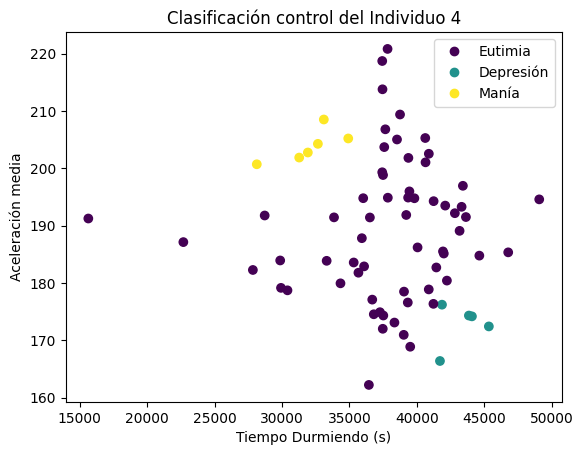

In [33]:
scatter = plt.scatter(data_filtered['Tiempo Durmiendo (s)'], data_filtered['Aceleracion media'], c=data_filtered['Grupo_mapped'], cmap='viridis')

handles, labels = scatter.legend_elements()
legend_labels = [key for key, value in mapeo_grupos.items()]
plt.legend(handles, legend_labels)

plt.xlabel('Tiempo Durmiendo (s)')
plt.ylabel('Aceleración media')
plt.title('Clasificación control del Individuo 4')

# Guaramos la imagen
plt.savefig('Control_pac.jpg')

plt.show()

## Propuesta modelo clasificación

In [34]:
def algoritmo_clasificacion(df):
    # Inicializar contadores para cada combinación de Grupo y Cluster
    contador = {
        'Eutimia': [0, 0, 0],
        'Depresión': [0, 0, 0],
        'Manía': [0, 0, 0]
    }

    # Contar las coincidencias
    for i in range(len(df)):
        grupo = df['Grupo'].iloc[i]
        cluster = df['Cluster'].iloc[i]
        if grupo in contador and cluster in [0, 1, 2]:
            contador[grupo][cluster] += 1

    # Determinar el grupo principal para Eutimia
    max_eutimia_value = max(contador['Eutimia'])
    grupo_eutimia = contador['Eutimia'].index(max_eutimia_value)

    # Determinar los grupos restantes (excluyendo el grupo principal de Eutimia)
    grupos_restantes = [i for i in [0, 1, 2] if i != grupo_eutimia]

    # Evaluar combinaciones para Depresión y Manía
    dep_mania_combinations = [
        (grupos_restantes[0], grupos_restantes[1]),
        (grupos_restantes[1], grupos_restantes[0])
    ]

    max_total = 0
    mejor_combination = None

    for comb in dep_mania_combinations:
        total = max_eutimia_value + contador['Depresión'][comb[0]] + contador['Manía'][comb[1]]
        if total > max_total:
            max_total = total
            mejor_combination = comb

    # Resultado final
    resultado = {
        "Eutimia": grupo_eutimia,
        "Depresión": mejor_combination[0],
        "Manía": mejor_combination[1],
        "Total Correct Matches": max_total
    }

    return resultado

## Modelo KMeans

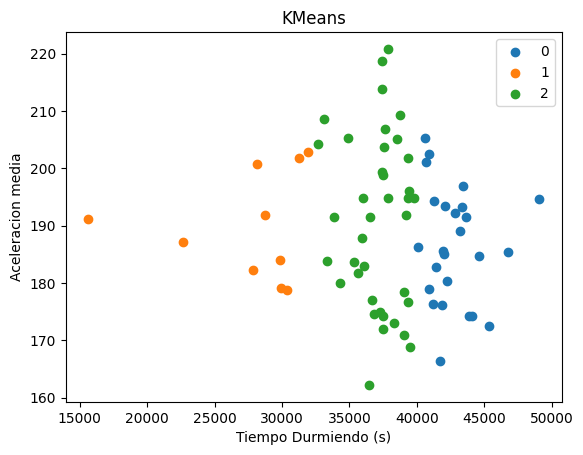

In [35]:
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans.fit(data_filtered[['Tiempo Durmiendo (s)', 'Aceleracion media', 'Aceleracion media vigorosa']])

# Obtener las etiquetas de los clusters asignadas a cada muestra
cluster_labels = kmeans.labels_
data_filtered['Cluster'] = kmeans.labels_

# Iterar sobre cada cluster y graficar los puntos correspondientes
for cluster in set(cluster_labels):
    x_cluster = data_filtered.loc[cluster_labels == cluster, 'Tiempo Durmiendo (s)']
    y_cluster = data_filtered.loc[cluster_labels == cluster, 'Aceleracion media']
    plt.scatter(x_cluster, y_cluster, label=f'{cluster}', cmap='viridis')

# Agregar leyenda
plt.legend()

# Personalizar el gráfico
plt.xlabel('Tiempo Durmiendo (s)')
plt.ylabel('Aceleracion media')
#plt.xticks(ticks=[15000, 20000, 25000, 30000, 35000])
plt.title('KMeans')
# Mostrar el gráfico
plt.show()

In [36]:
# Clasificación de los clústeres
agg_km = pd.DataFrame(cluster_labels)
agg_km.value_counts()

2    38
0    25
1    10
Name: count, dtype: int64

In [37]:
algoritmo_clasificacion(data_filtered)

{'Eutimia': 2, 'Depresión': 0, 'Manía': 1, 'Total Correct Matches': 43}

## Agglomerative Clustering

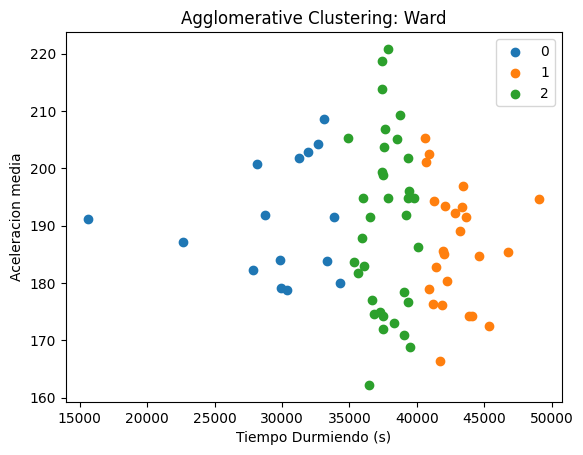

In [38]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Ajustar el modelo a los datos
clustering.fit(data_filtered[['Tiempo Durmiendo (s)', 'Aceleracion media', 'Aceleracion media vigorosa']])

# Obtener las etiquetas de los clusters asignadas a cada punto
labels = clustering.labels_
data_filtered['Cluster'] = clustering.labels_

for cluster in set(labels):
    #data_cluster = data_filtered_ward[data_filtered_ward['Ward'] == cluster]
    x_cluster = data_filtered.loc[labels == cluster, 'Tiempo Durmiendo (s)']
    y_cluster = data_filtered.loc[labels == cluster, 'Aceleracion media']
    plt.scatter(x_cluster, y_cluster, label=f'{cluster}')

plt.xlabel('Tiempo Durmiendo (s)')
plt.ylabel('Aceleracion media')
#plt.xticks(ticks=[15000, 20000, 25000, 30000, 35000])
plt.title('Agglomerative Clustering: Ward')
plt.legend()
plt.show()

In [39]:
# Clasificación de los clústeres
agg_ward = pd.DataFrame(labels)
agg_ward.value_counts()

2    34
1    24
0    15
Name: count, dtype: int64

In [40]:
algoritmo_clasificacion(data_filtered)

{'Eutimia': 2, 'Depresión': 1, 'Manía': 0, 'Total Correct Matches': 43}

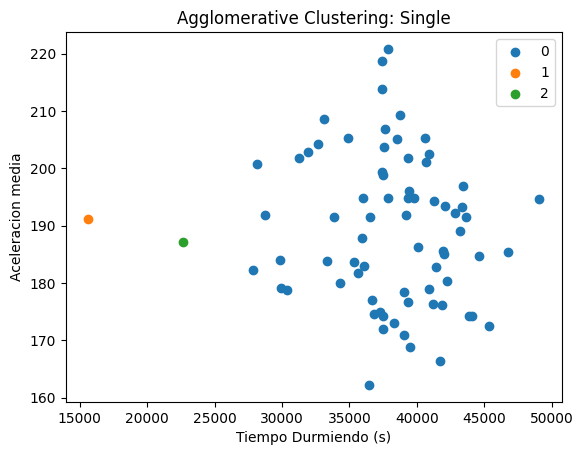

In [41]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='single')

# Ajustar el modelo a los datos
clustering.fit(data_filtered[['Tiempo Durmiendo (s)', 'Aceleracion media', 'Aceleracion media vigorosa']])

# Obtener las etiquetas de los clusters asignadas a cada punto
labels = clustering.labels_
data_filtered['Cluster'] = clustering.labels_

for cluster in set(labels):
    #data_cluster = data_filtered_ward[data_filtered_ward['Ward'] == cluster]
    x_cluster = data_filtered.loc[labels == cluster, 'Tiempo Durmiendo (s)']
    y_cluster = data_filtered.loc[labels == cluster, 'Aceleracion media']
    plt.scatter(x_cluster, y_cluster, label=f'{cluster}')

plt.xlabel('Tiempo Durmiendo (s)')
plt.ylabel('Aceleracion media')
#plt.xticks(ticks=[15000, 20000, 25000, 30000, 35000])
plt.title('Agglomerative Clustering: Single')
plt.legend()
plt.show()

In [42]:
# Clasificación de los clústeres
agg_single = pd.DataFrame(labels)
agg_single.value_counts()

0    71
1     1
2     1
Name: count, dtype: int64

In [43]:
algoritmo_clasificacion(data_filtered)

{'Eutimia': 0, 'Depresión': 1, 'Manía': 2, 'Total Correct Matches': 60}

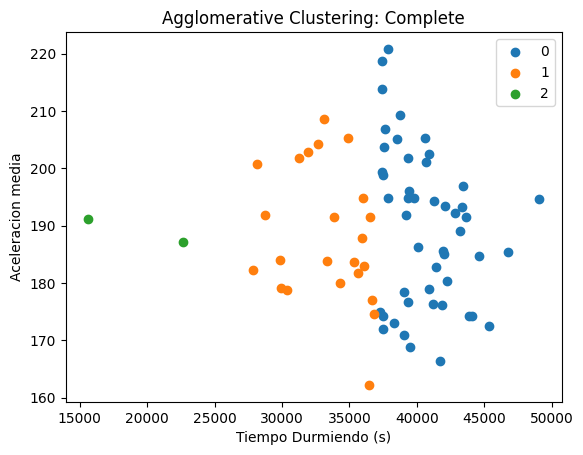

In [44]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')

# Ajustar el modelo a los datos
clustering.fit(data_filtered[['Tiempo Durmiendo (s)', 'Aceleracion media', 'Aceleracion media vigorosa']])

# Obtener las etiquetas de los clusters asignadas a cada punto
labels = clustering.labels_
data_filtered['Cluster'] = clustering.labels_

for cluster in set(labels):
    #data_cluster = data_filtered_ward[data_filtered_ward['Ward'] == cluster]
    x_cluster = data_filtered.loc[labels == cluster, 'Tiempo Durmiendo (s)']
    y_cluster = data_filtered.loc[labels == cluster, 'Aceleracion media']
    plt.scatter(x_cluster, y_cluster, label=f'{cluster}')

plt.xlabel('Tiempo Durmiendo (s)')
plt.ylabel('Aceleracion media')
#plt.xticks(ticks=[15000, 20000, 25000, 30000, 35000])
plt.title('Agglomerative Clustering: Complete')
plt.legend()
plt.show()

In [45]:
# Clasificación de los clústeres
agg_complete = pd.DataFrame(labels)
agg_complete.value_counts()

0    48
1    23
2     2
Name: count, dtype: int64

In [46]:
algoritmo_clasificacion(data_filtered)

{'Eutimia': 0, 'Depresión': 2, 'Manía': 1, 'Total Correct Matches': 49}

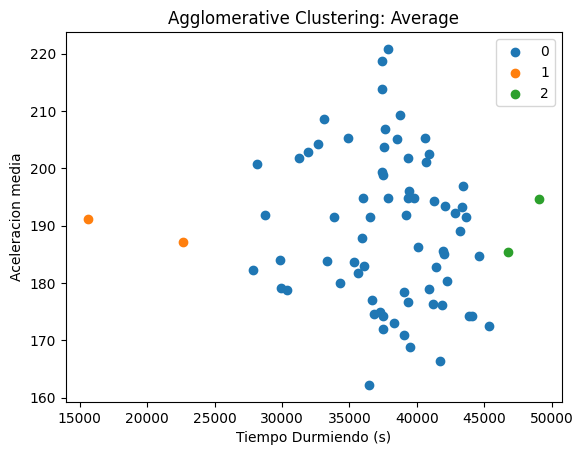

In [47]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

# Ajustar el modelo a los datos
clustering.fit(data_filtered[['Tiempo Durmiendo (s)', 'Aceleracion media', 'Aceleracion media vigorosa']])

# Obtener las etiquetas de los clusters asignadas a cada punto
labels = clustering.labels_
data_filtered['Cluster'] = clustering.labels_

for cluster in set(labels):
    #data_cluster = data_filtered_ward[data_filtered_ward['Ward'] == cluster]
    x_cluster = data_filtered.loc[labels == cluster, 'Tiempo Durmiendo (s)']
    y_cluster = data_filtered.loc[labels == cluster, 'Aceleracion media']
    plt.scatter(x_cluster, y_cluster, label=f'{cluster}')

plt.xlabel('Tiempo Durmiendo (s)')
plt.ylabel('Aceleracion media')
#plt.xticks(ticks=[15000, 20000, 25000, 30000, 35000])
plt.title('Agglomerative Clustering: Average')
plt.legend()
plt.show()

In [48]:
# Clasificación de los clústeres
agg_average = pd.DataFrame(labels)
agg_average.value_counts()

0    69
1     2
2     2
Name: count, dtype: int64

In [49]:
algoritmo_clasificacion(data_filtered)

{'Eutimia': 0, 'Depresión': 1, 'Manía': 2, 'Total Correct Matches': 58}

## BDSCAN

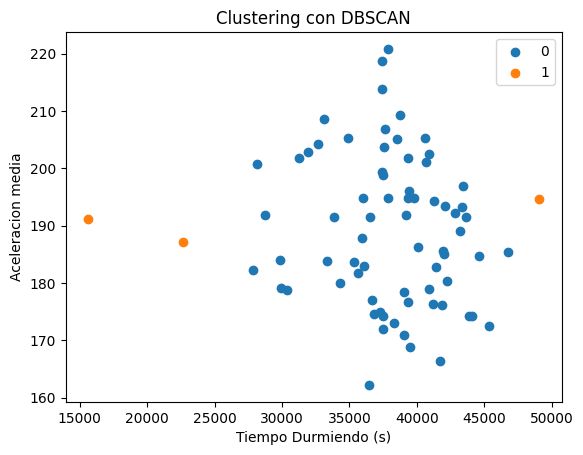

In [50]:
dbscan = DBSCAN(eps=2500, min_samples=6)
labels = dbscan.fit_predict(data_filtered[['Tiempo Durmiendo (s)', 'Aceleracion media', 'Aceleracion media vigorosa']])

# Añadir las etiquetas al DataFrame original
data_filtered['Cluster'] = labels

# Crear la leyenda
for cluster in set(labels):
    x_cluster = data_filtered.loc[labels == cluster, 'Tiempo Durmiendo (s)']
    y_cluster = data_filtered.loc[labels == cluster, 'Aceleracion media']
    plt.scatter(x_cluster, y_cluster, label=f'{cluster}')

# Visualización
plt.title('Clustering con DBSCAN')
plt.xlabel('Tiempo Durmiendo (s)')
plt.ylabel('Aceleracion media')
plt.legend([0, 1])
plt.show()

In [51]:
# Clasificación de los clústeres
agg_dbscan = pd.DataFrame(labels)
agg_dbscan.value_counts()

 0    70
-1     3
Name: count, dtype: int64

In [52]:
algoritmo_clasificacion(data_filtered)

{'Eutimia': 0, 'Depresión': 1, 'Manía': 2, 'Total Correct Matches': 59}

## GMM

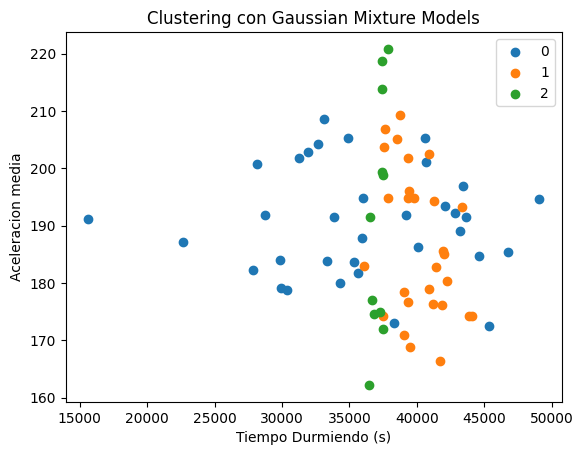

In [53]:
# Definir el número de clústeres
num_clusters = 3

# Inicializar y ajustar el modelo GMM
gmm = GaussianMixture(n_components=num_clusters, random_state=seed)
labels = gmm.fit_predict(data_filtered[['Tiempo Durmiendo (s)', 'Aceleracion media', 'Aceleracion media vigorosa']])

# Añadir las etiquetas al DataFrame original
data_filtered['Cluster'] = labels

# Crear la leyenda
for cluster in set(labels):
    x_cluster = data_filtered.loc[labels == cluster, 'Tiempo Durmiendo (s)']
    y_cluster = data_filtered.loc[labels == cluster, 'Aceleracion media']
    plt.scatter(x_cluster, y_cluster, label=f'{cluster}')

# Visualización
plt.title('Clustering con Gaussian Mixture Models')
plt.xlabel('Tiempo Durmiendo (s)')
plt.ylabel('Aceleracion media')
plt.legend()
plt.show()

In [54]:
# Clasificación de los clústeres
agg_gmm = pd.DataFrame(labels)
agg_gmm.value_counts()

0    34
1    28
2    11
Name: count, dtype: int64

In [55]:
algoritmo_clasificacion(data_filtered)

{'Eutimia': 0, 'Depresión': 1, 'Manía': 2, 'Total Correct Matches': 31}